In [38]:
from plywood_gallery import ChapterManager
#ChapterManager.clean("Image Options")
ChapterManager.reset_counter()
ChapterManager.set_chapter_name("Layer Options")

NapariSettings (defaults excluded)
----------------------------------
appearance:
  layer_tooltip_visibility: true
  theme: light
application:
  first_time: false
  window_position:
  - 800
  - 300
  window_size:
  - 1000
  - 100
  window_state: '!QBYTE_AAAA/wAAAAD9AAAAAgAAAAAAAAECAAACGPwCAAAAAvsAAAAcAGwAYQB5AGUAcgAgAGMAbwBuAHQAcgBvAGwAcwEAAAAAAAACGAAAAUkAAAFJ+wAAABQAbABhAHkAZQByACAAbABpAHMAdAAAAAAAAAACGAAAALcA////AAAAAwAAAAAAAAAA/AEAAAAB+wAAAA4AYwBvAG4AcwBvAGwAZQAAAAAA/////wAAADIA////AAABYgAAAhgAAAAEAAAABAAAAAgAAAAI/AAAAAA='
  window_statusbar: false

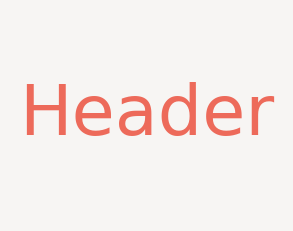

In [39]:
%%capture_png -p Header2.png --celltype Header --style "width:140px"
import matplotlib.pyplot as plt
import napari
import numpy as np
import scipy
from scipy import ndimage as ndi
from skimage import data

from napari.settings import get_settings

get_settings().application.window_position = (800,300)
get_settings().application.window_size = (1000,100)
get_settings().application.window_fullscreen = False
get_settings().application.window_statusbar =  False
get_settings().application.save_window_state =  False

try:
    viewer
except NameError:
    viewer = napari.Viewer()
    viewer.theme = "light"
    viewer.dims.ndisplay = 3

def make_screenshot(viewer):
    img = viewer.screenshot(canvas_only=True, flash= False)
    plt.imshow(img)
    plt.axis("off")

# make data
blobs = data.binary_blobs(length=301, volume_fraction=0.1, n_dim=3, seed=42)
blobs  = blobs[200:,200:, :-100]
blobs[:,:,:50]=1

import matplotlib.pyplot as plt #NOT
fix, ax = plt.subplots(figsize=(5,4), facecolor="#F7F5F3") #NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A") #NOT
ax.text(0.5, 0.5, "Header",**text_kwargs) #NOT
ax.axis("off"); #NOT

from napari.settings import get_settings
get_settings()

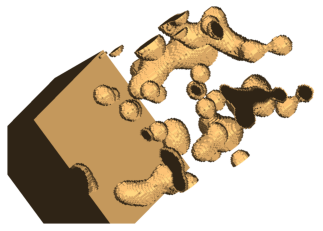

In [40]:
%%capture_png -p FirstView.png --celltype Normal --style "width:200px"
viewer.reset_view()
viewer.layers.clear()
viewer.dims.ndisplay = 3
viewer.theme = "light"
layer1 = viewer.add_labels(blobs, name="layer1", seed=0.03)
viewer.camera.angles = (30, 40, 80)
layer1.opacity =1
make_screenshot(viewer)


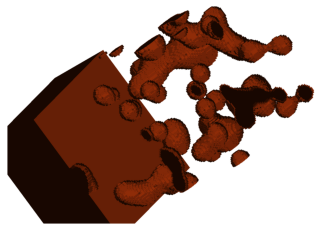

In [41]:
%%capture_png -p Random1.png --celltype Normal --style "width:200px"
layer1 = viewer.add_labels(blobs, name="layer1", seed=0.5)
viewer.camera.angles = (30, 40, 80)
layer1.opacity =1
make_screenshot(viewer)

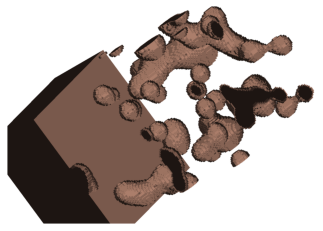

In [42]:
%%capture_png -p Random2.png --celltype Normal --style "width:200px"
layer1 = viewer.add_labels(blobs, name="layer1", seed=0.9)
viewer.camera.angles = (30, 40, 80)
layer1.opacity =1
make_screenshot(viewer)

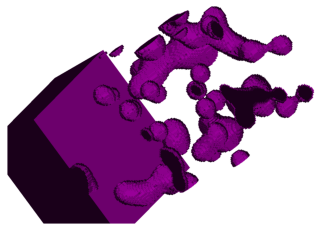

In [43]:
%%capture_png -p Random2.png --celltype Normal --style "width:200px"
my_red= {i: "purple" for i in range(1,10)} # currently slow!!
my_layer = viewer.add_labels(blobs, name='blobs',color=my_red)
my_layer.opacity =1
make_screenshot(viewer)

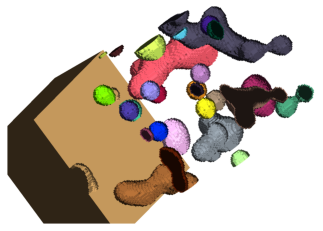

In [44]:
%%capture_png -p Labeled.png --celltype Normal --style "width:200px"
viewer.layers.clear()
labeled = ndi.label(blobs)[0]
layer1 = viewer.add_labels(labeled, name='layer2',seed=0.03)
viewer.camera.angles = (30, 40, 80)
layer1.opacity =1
make_screenshot(viewer)

In [45]:
#ChapterManager.clean("Layer Options")

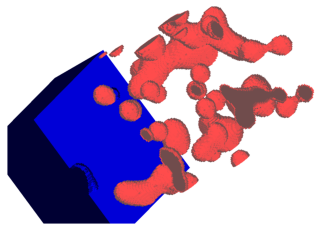

In [46]:
%%capture_png -p FindBiggest.png --celltype Normal --style "width:200px"
# label data
mylabel, feature_num=scipy.ndimage.label(blobs)
label_index,counts = np.unique(mylabel, return_counts= True)
#sort labels
labeled_dots = {}
for A, B in zip(label_index,counts):
    labeled_dots[A] = B
sorted_dict = dict(sorted(labeled_dots.items(), key=lambda item: item[1], reverse=True))
highest_count=list(sorted_dict.keys())[1] #get highest label

viewer.layers.clear()
labeled, nums = ndi.label(blobs)
my_red= {i: "red" for i in range(1,nums+1)}

layer1 = viewer.add_labels(labeled, name='blobs',
color=my_red)

my_blue= {i: "blue" for i in range(1,nums+1)}
mask = (labeled == highest_count)
layer1 = viewer.add_labels(mask, name='special_blob',
color=my_blue)

viewer.camera.angles = (30, 40, 80)
layer1.opacity =1
make_screenshot(viewer)